In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 10]
sns.set_style("white")
sns.set_context("poster")

# Chinese Public Diplomacy

This dataset was downloaded from https://tinyletter.com/data-is-plural/archive from the 22 January 2020 entry. It is composed of first of its kind quantifiable data on China’s public diplomacy efforts from two of AidData’s reports 'Ties That Bind' and 'Influencing the Narrative' that is available through AidData’s China’s Public Diplomacy Dashboard. This includes metrics for five types of public diplomacy: financial, cultural, elite-to-elite, exchange, and informational. 

see also: Custer, S., Russell, B. DiLorenzo, M., Cheng, M., Ghose, S., Sims, J., Turner, J., and H. Desai. (2018). Ties That Bind: Quantifying China’s public diplomacy and its "good neighbor" effect. Williamsburg, VA: AidData at William & Mary

In [129]:
#Chinese Public Diplomacy
cpd = pd.read_excel('ChinesePublicDiplomacy.xlsx')

In [128]:
cpd.head()

,receiving_country,year,confucius_institutes,sister_cities_established,government_visits,military_visits,total_elite_visits,ambassador_op_eds,journalist_visits,media_partnerships,outbound_chinese_students,inbound_students_to_china
0,Australia,2000,0,8,46,8,54,0,0,0,5008,0
1,Australia,2001,0,1,49,5,54,0,0,0,0,0
2,Australia,2002,0,1,15,3,18,0,0,0,17343,1001
3,Australia,2003,0,5,13,6,19,0,0,0,23448,918
4,Australia,2004,0,3,9,4,13,0,0,2,28309,1159


In [127]:
len(cpd.receiving_country.unique()), print(cpd.receiving_country.unique())

['Australia' 'Brunei' 'Cambodia' 'Fiji' 'Indonesia' 'Japan' 'Kiribati'
 'Laos' 'Malaysia' 'Micronesia' 'Mongolia' 'Myanmar' 'Nauru' 'New Zealand'
 'North Korea' 'Papua New Guinea' 'Philippines' 'Samoa' 'Singapore'
 'South Korea' 'Thailand' 'Timor-Leste' 'Tonga' 'Vanuatu' 'Vietnam']


(25, None)

In [34]:
cls = cpd.columns

In [40]:
countries = cpd.receiving_country.unique()
countries

array(['Australia', 'Brunei', 'Cambodia', 'Fiji', 'Indonesia', 'Japan',
       'Kiribati', 'Laos', 'Malaysia', 'Micronesia', 'Mongolia',
       'Myanmar', 'Nauru', 'New Zealand', 'North Korea',
       'Papua New Guinea', 'Philippines', 'Samoa', 'Singapore',
       'South Korea', 'Thailand', 'Timor-Leste', 'Tonga', 'Vanuatu',
       'Vietnam'], dtype=object)

In [37]:
cpd.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

Japan 251785 1244433
South Korea 874226 416327
Thailand 169770 56297


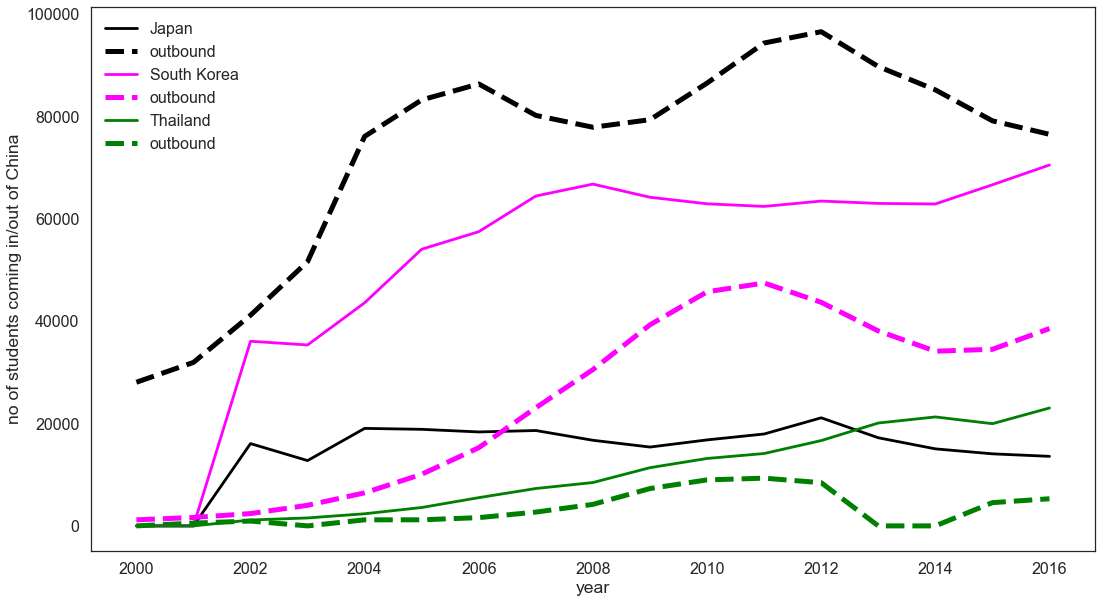

In [106]:
max_no = 4
nstudents = []
colors = ['black', 'magenta', 'green', 'blue', 'red', 'cyan']
i = 0
for country in countries:
    
    if np.sum(cpd['inbound_students_to_china'][cpd.receiving_country == country]) > 150000:
        
        plt.plot(cpd.year[cpd.receiving_country == country], cpd['inbound_students_to_china'][cpd.receiving_country == country], label = country, color = colors[i])
        plt.plot(cpd.year[cpd.receiving_country == country], cpd['outbound_chinese_students'][cpd.receiving_country == country], label = 'outbound', ls = '--', color = colors[i], lw = 5)
        i += 1

        print(country, np.sum(cpd['inbound_students_to_china'][cpd.receiving_country == country]), np.sum(cpd['outbound_chinese_students'][cpd.receiving_country == country]))


plt.xlabel('year')
plt.ylabel('no of students coming in/out of China')
#plt.yscale('log')
plt.legend()



The graph shows the variation of incoming (solid line) foreign students to China and outgoing (dotted line) Chinese students to other countries. I only show the three countries with the largest numbers of incoming students to China:
South Korea, Japan and Thailand. South Korea and Japan are two developped neighbouring nations with similar GDP and population density, however it seems outgoing Chinese students are 3 times more likely to choose Japan (despite the negative sentiment of the Chinese population towards Japan) over South Korea. The opposite is true for incoming students, with 4 times more Koreans than Japanese choosing China for their studies.

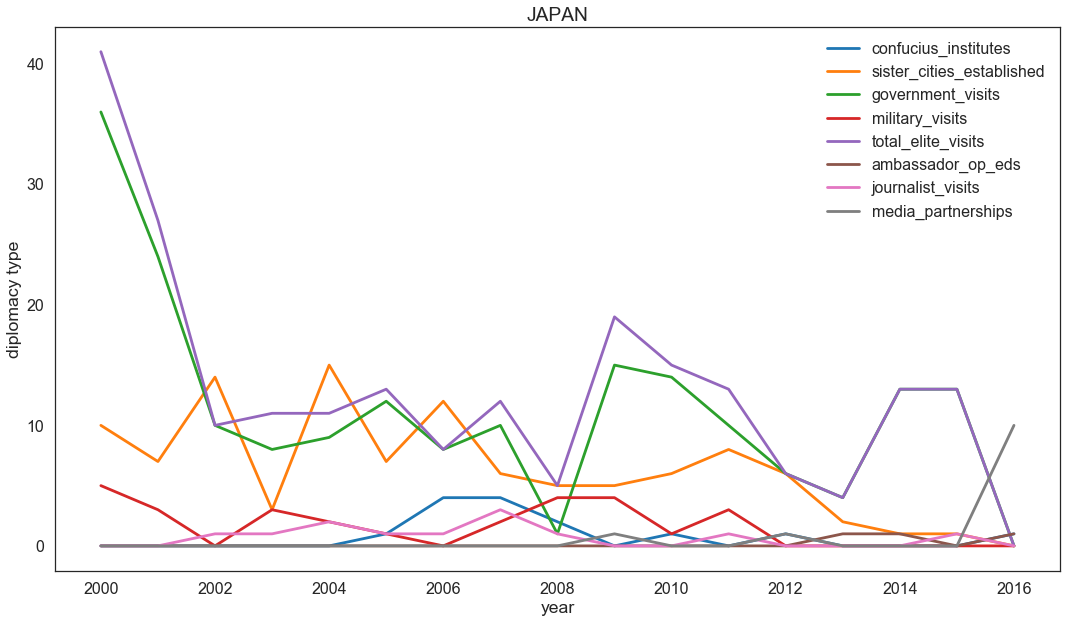

In [122]:
country = 'Japan'    
for soft_power in cls[2:10]:
    plt.plot(cpd.year[cpd.receiving_country == country], cpd[soft_power][cpd.receiving_country == country], label = soft_power)

plt.xlabel('year')
plt.ylabel('diplomacy type')
plt.title('JAPAN')
plt.legend()

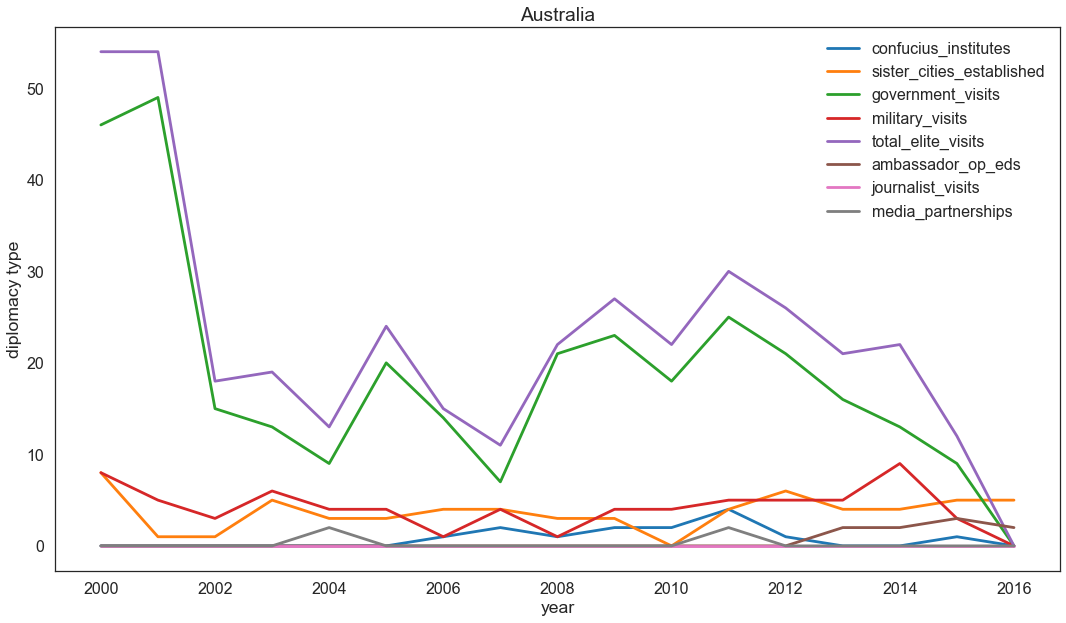

In [123]:
country = 'Australia'    
for soft_power in cls[2:10]:
    plt.plot(cpd.year[cpd.receiving_country == country], cpd[soft_power][cpd.receiving_country == country], label = soft_power)

plt.xlabel('year')
plt.ylabel('diplomacy type')
plt.title('Australia')
plt.legend()

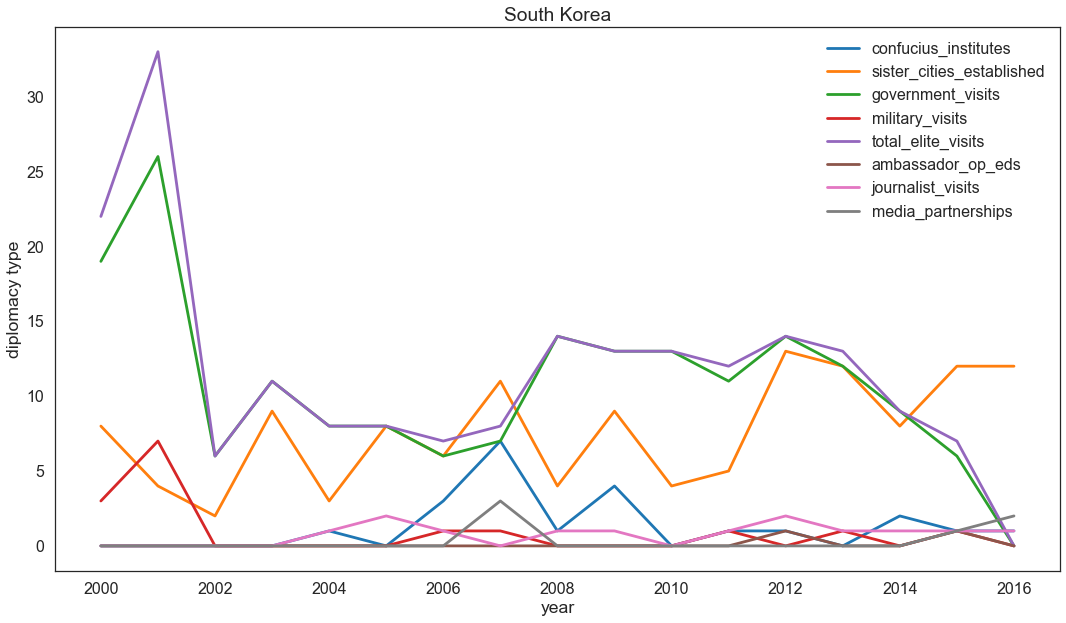

In [124]:
country = 'South Korea'    
for soft_power in cls[2:10]:
    plt.plot(cpd.year[cpd.receiving_country == country], cpd[soft_power][cpd.receiving_country == country], label = soft_power)

plt.xlabel('year')
plt.ylabel('diplomacy type')
plt.title('South Korea')
plt.legend()

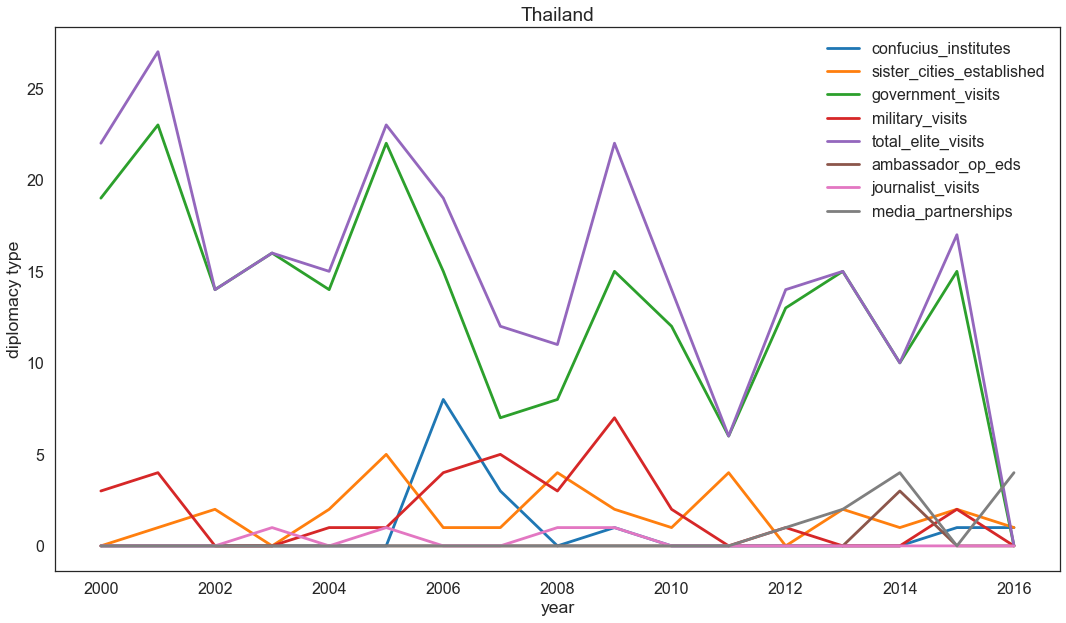

In [126]:
country = 'Thailand'    
for soft_power in cls[2:10]:
    plt.plot(cpd.year[cpd.receiving_country == country], cpd[soft_power][cpd.receiving_country == country], label = soft_power)

plt.xlabel('year')
plt.ylabel('diplomacy type')
plt.title('Thailand')
plt.legend()

From these plots we can see that the government visits and the high level official visits between China and neighbouring countries has decreased since 2000. There is a very low number of media partnership and journalist visits. Interesting to note that the number of sister cities with South Korea has slightly increased over the past 20 years, while sisters cities numbers with Japan have decreased.

# China’s Financial Diplomacy Project Details

In [130]:
#pandas financial
pf = pd.read_excel('ChineseFinancialPublicDiplomacyProjectDetails.xlsx')

In [131]:
pf.head()

,project_id,type,category,visible_sector,recommended_for_research,umbrella_project,year,donor,funding_agencies,implementing_agencies,...,is_ground_truthing,loan_type,interest_rate,maturity,grace_period,grant_element,location_details,contacts,is_official_finance,year_uncertain
0,32016,Financial,Infrastructure Investments,False,True,False,2000,China,"Export-Import Bank of China, Government Agency",NaN,...,False,Concessional,3.0,12.0,4.0,NaN,"Chup and Memot plantations, Kompong Cham Province","Sok An, Cabinet Minister; Keat Chhon, state mi...",True,False
1,32031,Financial,Infrastructure Investments,False,True,False,2000,China,"Export-Import Bank of China, Government Agency",NaN,...,False,Concessional,3.0,20.0,4.0,45.9,NaN,"Keat Chhon, Cambodian Finance Minister; Ning F...",True,False
2,32035,Financial,Infrastructure Investments,False,True,False,2001,China,"Unspecified Chinese Government Institution, Go...",NaN,...,False,NaN,NaN,NaN,NaN,NaN,Kompong Speu,"Ning Fukui, Chinese Ambassador",True,False
3,32038,Financial,Infrastructure Investments,True,True,False,2001,China,"Unspecified Chinese Government Institution, Go...",NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,"Chhoeung Chamroeun, Secretary of State (Cambod...",True,False
4,32040,Financial,Infrastructure Investments,False,True,False,2001,China,"Unspecified Chinese Government Institution, Go...","Beijing G&M Engineering Construction Co., Ltd....",...,False,NaN,NaN,NaN,NaN,NaN,"Kampong Cham, Kampong Speu, Kampong Chhnang, K...","Ning Fukui, Chinese Ambassador to Cambodia; Hu...",True,False


In [132]:
pf.columns

Index(['project_id', 'type', 'category', 'visible_sector',
       'recommended_for_research', 'umbrella_project', 'year', 'donor',
       'funding_agencies', 'implementing_agencies', 'title', 'description',
       'status', 'flow', 'flow_class', 'intent', 'crs_sector_code',
       'crs_sector_name', 'sources', 'sources_count', 'donor_agencies',
       'donor_agencies_count', 'recipient_agencies',
       'recipient_agencies_count', 'amount', 'currency', 'deflators_used',
       'exchange_rates_used', 'usd_defl', 'usd_current', 'start_actual',
       'start_planned', 'end_actual', 'end_planned', 'recipient_condensed',
       'recipient_cow_code', 'recipient_oecd_code', 'recipient_oecd_name',
       'recipient_iso3', 'recipient_iso2', 'recipient_un_code',
       'recipient_imf_code', 'debt_uncertain', 'line_of_credit',
       'is_cofinanced', 'is_ground_truthing', 'loan_type', 'interest_rate',
       'maturity', 'grace_period', 'grant_element', 'location_details',
       'contacts', 'is_o

In [133]:
len(pf.category.unique()), print(pf.category.unique())

['Infrastructure Investments' 'Humanitarian Assistance' 'Budget Support'
 'Debt Relief']


(4, None)

# Global Chinese Official Finance Dataset

The dataset captures the known universe of officially-financed Chinese projects in 5 regions of the world from 2000-2014
(including Africa, the Middle East, Asia and the Pacific, Latin America and the Caribbean, and Central and Eastern Europe).

Dreher, Axel, Andreas Fuchs, Bradley Parks, Austin M. Strange, and Michael J. Tierney. 2017. Aid, China, and
Growth: Evidence from a New Global Development Finance Dataset. AidData Working Paper #46. Williamsburg,
VA: AidData.

Scope: Official Finance from China

Flow Class Covered: Official Development Assistance and Other Official Flows

Year Coverage: 2000-2014

Geographical Coverage: 140 countries and territories in Africa, the Middle East, Asia and the Pacific, Latin America and the Caribbean, and Central and Eastern Europe

Project Count: 5,466

Total Commitment Amount (2014 USD): $877,655,767,899.49

In [135]:
gc = pd.read_excel('GlobalChineseOfficialFinanceDataset_v1.0.xlsx')

In [136]:
gc.columns

Index(['project_id', 'recommended_for_research', 'umbrella', 'year', 'donor',
       'funding_agency', 'implementing_agency', 'recipient_condensed', 'title',
       'description', 'status', 'flow', 'flow_class', 'intent', 'amount',
       'currency', 'usd_defl_2014', 'usd_current', 'crs_sector_code',
       'crs_sector_name', 'sources', 'sources_count', 'cofinancing_agency',
       'recipient_agencies', 'recipient_agencies_count', 'deflators_used',
       'exchange_rates_used', 'start_actual', 'start_planned', 'end_actual',
       'end_planned', 'year_uncertain', 'all_recipients', 'recipient_count',
       'recipient_cow_code', 'recipient_oecd_code', 'recipient_oecd_name',
       'recipient_iso3', 'recipient_iso2', 'recipient_un_code',
       'recipient_imf_code', 'recipient_region', 'line_of_credit',
       'is_cofinanced', 'is_ground_truthing', 'loan_type', 'interest_rate',
       'maturity', 'grace_period', 'grant_element', 'location_details',
       'contacts', 'source_triangulatio

In [264]:
df = pd.DataFrame({'$': gc['usd_defl_2014'], 'country': gc['recipient_condensed'], 'year': gc['year']})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna(how='any', axis = 0)

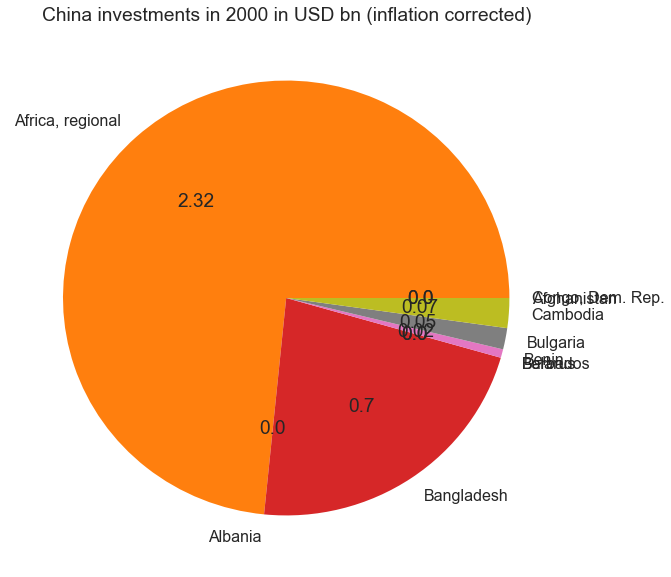

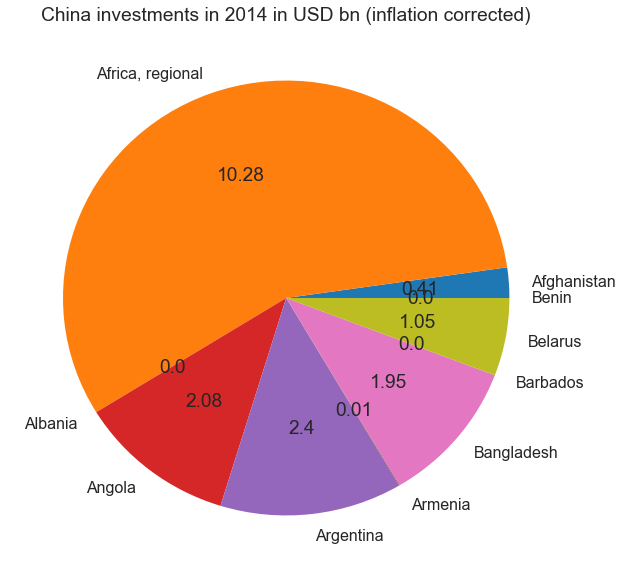

In [323]:
df_year = np.round(df[df['year'] == 2000].groupby('country')['$'].sum()/10**9.,2)
def absolute_value(val):
    a  = np.round(val/100.*df_year.values[0:10].sum(), 2)
    return a
plt.rcParams['figure.figsize'] = [10, 10]
plt.pie(df_year.values[0:10], labels = df_year.index[0:10], autopct=absolute_value)
plt.title('China investments in 2000 in USD bn (inflation corrected)')
plt.show()

df_year = np.round(df[df['year'] == 2014].groupby('country')['$'].sum()/10**9.,2)
def absolute_value(val):
    a  = np.round(val/100.*df_year.values[0:10].sum(), 2)
    return a
plt.rcParams['figure.figsize'] = [10, 10]
plt.pie(df_year.values[0:10], labels = df_year.index[0:10], autopct=absolute_value)
plt.title('China investments in 2014 in USD bn (inflation corrected)')
plt.show()